# Logistic Regression
&emsp;&emsp;logistic regression逻辑回归算法可以说是机器学习中十分常见和实用性极强的算法了。因为其参数的可解释性，逻辑回归在工业界中受到青睐。比如，在金融征信相关的模型中，我们需要明确解释某个变量在变化时，其最终信用的变化趋势，我们叫做业务可解释性。下面，我们就直接进入正题。

&emsp;&emsp;LR算法是对二分类问题一种回归分析预测方法。我们从以下步骤进行回顾：
- 假设空间的函数
- 目标（损失）函数
- 梯度下降

## Sigmoid函数
&emsp;&emsp;假设模型参数为 $\{\alpha_{0},alpha_{1},...,alpha_{n}\}$ ,其中 $\alpha_{0}$ 为截距。可以用以下公式来表示y=1事件的概率：$$P(y=1)=\frac{exp(\alpha_{0}+\alpha_{1}x_{1}+...+\alpha_{n}x_{n})}{1+exp(\alpha_{0}+\alpha_{1}x_{1}+...+\alpha_{n}x_{n})}$$

转换上式形式，并令 $z=\alpha_{0}+\alpha_{1}x_{1}+...+\alpha_{n}x_{n}$，则可以转换成sigmoid函数格式：$$sigmoid=\frac{1}{1+exp(-z)}$$
它表示y=1事件的概率p。再对其进行简单的转换就可以得到：$$\ln{\frac{p}{1-p}}=z$$
公式 $\frac{p}{1-p}$称为比率，表示y=1的概率与y=0概率的比值。LR算法可以看成是用**比率的对数作为因变量的线性回归模型**。  
&emsp;&emsp;sigmoid函数可以得到一个概况预测值，另外其数学性质良好，是任意阶可导的凸函数，对于许多优化方法都是可使用的。在传统的神经网络中，sigmoid也曾作为神经元激活函数使用。

## 似然估计与损失函数
&emsp;&emsp;根据sigmoid函数，假设y=1时预测概率为: $$P(y=1|x)=h_{\alpha}(x)=\frac{1}{1+exp(-\alpha^{T}x)}$$ 假设y服从伯努利分布，则 y=0时概率为: $$P(y=0|x)=1-h_{\alpha}(x)$$ 
我们可以合并为： $$P(y|x)=h_{\alpha}(x)^{y}(1-h_{\alpha}(x))^{1-y}$$

&emsp;&emsp;根据上式我们就可以构造出该分布的似然函数，然后运用最大似然估计思想来求解其参数，我们根据上式写出其极大似然函数：
$$\begin{eqnarray}
L(\alpha) &=& \prod_{i=1}^{m}p(y^{i}|x^{i};\theta) \\
&=& \prod_{i=1}^{m}h_{\alpha}(x^{i})^{y^{i}}(1-h_{\alpha}(x^{i}))^{1-y^{i}}
\end{eqnarray}
$$
两边取对数后，可以得到我们定义的损失函数（添加L2正则）：
$$
J(\alpha) = \log{L(\alpha)} + reg = \sum_{i=1}^{m} y^{i} \log {h_{\alpha}(x^{i})} + (1-y^{i}) \log {(1-h_{\alpha}(x^{i}))} + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^2
$$

## 梯度下降
&emsp;&emsp;接下来对损失函数 $J(\alpha)$ 求梯度可以得到：
$$\begin{eqnarray}
\frac{\partial{J(\alpha)}}{\partial{\alpha_{j}}} &=&
-\frac{1}{m} \sum_{i}^{m} \big[y^i(1-h_{\alpha}(x^i))*(-x_{j}^i)+(1-y^i)h_{\alpha}(x^i)*(x_{j}^i) \big] \\
&=& -\frac{1}{m} \sum_{i}^{m} (y^i-h_{\alpha}(x^{i})) * x_{j}^{i} \\
&=& -\frac{1}{m} \sum_{i}^{m} \big(h_{\alpha}(x^{i}) - y^{i}) * x_{j}^{i} 
\end{eqnarray}
$$

添加正则项后，对于截距和非截距参数的梯度有：  
截距参数：
$$
\frac{\partial{J(\alpha)}}{\partial{\alpha_{0}}} = 
-\frac{1}{m} \sum_{i}^{m} \big(h_{\alpha}(x^{i}) - y^{i}) * x_{0}^{i}
$$

非截距参数：
$$
\frac{\partial{J(\alpha)}}{\partial{\alpha_{j}}} = 
-\frac{1}{m} \sum_{i}^{m} \big(h_{\alpha}(x^{i}) - y^{i}) * x_{j}^{i} + \frac{\lambda}{m}\alpha_{j}
$$


## 代码示例
&emsp;&emsp;OK，上面讲完了公式原理，我们现在依照上面的公式用python实现一下logistic regression。使用的数据集是8\*8的手写数字集，仅选取了其中的数字0和数字1作为样本进行训练和验证。

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- 随便看一个数字的样子

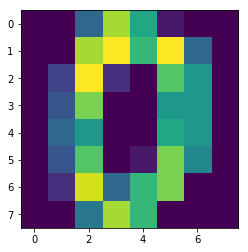

In [2]:
digits = datasets.load_digits()
data = digits.data
target = digits.target

plt.imshow(digits.images[0])
plt.show()

数据预处理：
- 选取出数字0和数字1样本；
- 对数据进行归一化；
- 随机划分训练和验证集

In [3]:
label_0_index = np.where(target == 0)[0]
label_1_index = np.where(target == 1)[0]
index = np.append(label_0_index, label_1_index)
np.random.shuffle(index)
data = data[index]
target = target[index]
scale = StandardScaler().fit(data)
data = scale.transform(data)
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=10)

- LR类，使用L2正则化

In [4]:
class LR(object):
    def __init__(self, input_size, learning_rate=0.03, penalty=0.1, loop=10):
        self.theta = np.random.randn(input_size + 1)
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.loop = loop

    @staticmethod
    def add_one(x):
        return np.hstack((np.ones((x.shape[0], 1)), x))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def hypothesis(self, x):
        h = self.sigmoid(np.dot(x, self.theta))
        return h

    def cal_loss(self, h, x, y):
        m = x.shape[0]
        loss = 0
        for i in range(m):
            loss += - y[i] * np.log(h[i]) - (1 - y[i]) * np.log(1 - h[i])
        loss = loss / m
        reg = self.penalty * np.sum(pow(self.theta[1:], 2)) / (2 * m)
        loss += reg
        return loss

    def cal_gradient(self, h, x, y):
        m = x.shape[0]
        gradient = (1.0 / m) * np.dot((h - y), x)
        g0 = gradient[0]
        reg = (self.penalty / m) * self.theta
        gradient += reg
        gradient[0] = g0
        return gradient

    def train(self, x, y):
        x = self.add_one(x)
        for i in range(self.loop):
            h = self.hypothesis(x)
            loss = self.cal_loss(h, x, y)
            gradient = self.cal_gradient(h, x, y)
            self.theta -= gradient * self.learning_rate
            if i % 10 == 0:
                print('step: {}, loss: {}'.format(i, loss))

    def predict(self, x):
        x = self.add_one(x)
        return np.around(self.hypothesis(x))

参数：
- 循环100次
- 学习率0.03
- 正则化lambda=0.1

In [5]:
lr = LR(train_x.shape[1], loop=100)
lr.train(train_x, train_y)
predict = lr.predict(test_x)
correct = np.sum(predict == test_y)
accuracy = correct / float(test_y.shape[0])
print('correct: {}, accuracy: {}'.format(correct, accuracy))

step: 0, loss: 6.828746415814336
step: 10, loss: 3.845734220130174
step: 20, loss: 2.092951878744514
step: 30, loss: 1.2679455302119425
step: 40, loss: 0.8612109120034762
step: 50, loss: 0.6392511184451278
step: 60, loss: 0.5037327520378094
step: 70, loss: 0.41308537094320574
step: 80, loss: 0.34833322802432765
step: 90, loss: 0.2998758322809995
correct: 94, accuracy: 0.8703703703703703


## enjoy it !